# Lab 4. Probabilistic Inference
# Task 4.1 Iris Classification Using Naïve Bayes 
## Problem Descriptions
Describe the problem here...  Given four features of the iris flowers we can build a model to predict the various species contained in the dataset.  


1.  Formulate the problem of iris classification using Naives Bayes method;
  *  Bayes Theorem can be written as;
      *  P(A|B) = P(B|A).P(A)/P(B) ...eq 1
        *  P(A|B) is the posterity probability of A given B.
        *  P(B|A) is the posterity probability of B given A.
  *  Bayes Theorem can also be writtenas;
      *  P(A|B) = P(B|A).P(A)/ P(B|A).P(A).P(B|not A).P(not A) ...eq 2
        *  P(not A) is the probability of A being false.
        *  P(B|not A) is the probability of B given A is false.
  * Naives Bayes Classifier is based upon Bayes Theorem applying independent assumptions.  Hence, given muti[ple species and mutiple features we get-
    *  𝑃(𝑐𝑖|𝑓1, 𝑓2) = 𝛼𝑃(𝑓1|𝑐𝑖) 𝑃(𝑓2|𝑐𝑖) 𝑃(𝑐𝑖) ... eq 3
      *  P(ci|f1, f2) claculates the posterity probability of species given features.
      *  P(ci) is prio probability for each iris class.
      *  𝑃(𝑓1|𝑐𝑖), 𝑃(𝑓2|𝑐𝑖) is the conditional probabilty of each class.
     
## Implementation and Results

## Model 1

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


In [ ]:
# We only use two features (sepal and petal length)
iris = datasets.load_iris()

# X = iris.data
X = iris.data[:, [0,2]]
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[15  0  0]
 [ 0  9  2]
 [ 0  0  4]]
Prior:
 [0.29166667 0.325      0.38333333]
Mean:
 [[4.95142857 1.46285714]
 [5.95384615 4.23846154]
 [6.59347826 5.54565217]]
Variance:
 [[0.13449796 0.02404898]
 [0.28761342 0.23416174]
 [0.41887051 0.32161153]]


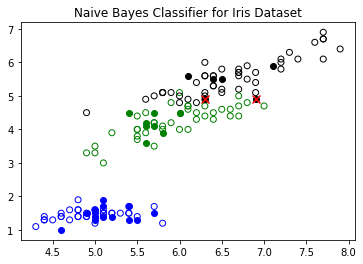

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)
  
error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

# ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')  
# # ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
# ax = plt.gca()
# ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

##Model 2

In [ ]:
# We only use 4 features (sepal and petal length, sepal and petal width)
iris = datasets.load_iris()

# X = iris.data
X = iris.data
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)

Accuracy: 1.0
Confusion Matrix:
 [[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Prior:
 [0.325      0.34166667 0.33333333]
Mean:
 [[5.         3.41282051 1.47179487 0.25384615]
 [5.96829268 2.78292683 4.30731707 1.35609756]
 [6.4825     2.93       5.4725     2.0325    ]]
Variance:
 [[0.11025641 0.15291256 0.02561473 0.01274162]
 [0.27094587 0.09409875 0.22604402 0.03514575]
 [0.33444375 0.0831     0.26549375 0.07569375]]


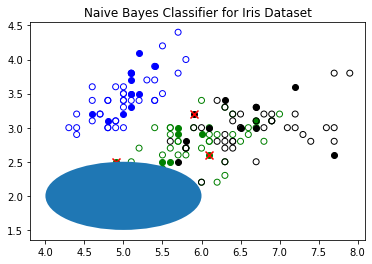

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)
  
error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')  
ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
ax = plt.gca()
ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

## Discussions

In this task, I have built a mchine learning algorithm to predict species of flowers from there petal and sepal features.  Two models was built, the first using two features and the other used all four.  There were 3 class of flowers.

In the first class, the 2 features used was petal length and sepal length.  As seen on the graph h=there is better cluster separation in the first model than the second.  Yet according to the confusion matrix, it is the second that has the higher acuracy.  This means that model 2 clasifier gets the preduiction right more than model 1. 

Hence model 2 may be the model of choice since it out perfomred model 1.  The Bayesian Netwrok seems to include effects from all features there by providing such better solution as seen in the model 2 results.      -



